# Multilayer Perceptron in PyTorch

## Introduction

### Goal

Learn the basics of PyTorch (PT) by working on an artificial classification problem.

### Plan

In this tutorial we will create a set of synthetic data that we will use as an example problem.
Then we will create a MLP model and learn its parameters from the data. Finally we will visualize the different learning measures and the parameters of the model.

In a second part we will modify our data and adapt the hyper-parameters (e.g. number of hidden neurons) of our model to allow better classification.

In the next part we will use the basic functions of PT to understand our process and how PT works. But we will also mention the high level features and aids of PT that facilitate our tasks.

### Requirements

Python >=3.5

Modules python:

- pytorch >=1.0
- numpy
- matplotlib

### Evaluation considerations

- We take into account the correctness of the solutions but also their generality and quality of the code
- Comment and discuss on the results of all your exercises (in a cell immediately after the results). You may also state the difficulties encountered, lessons learned and your understanding of the problem and solution
- Clean-up your code before submission, do not leave unnecessary code attempts, or if you deem it important, leave them in a way that it is easily understood and with comments/discussion
- We also value the originality of the solutions, don't hesitate in performing unrequested additional tasks in relation to the exercises
- Non-advanced exercises will account for approx. 14/20 of the grade. Advanced exercises will contribute to the remaining score and may compensate for errors in the non-advanced ones
- You may receive help from colleagues on the non-advanced questions, but you must state who has helped you. Approximately 1/20 of the grade is assigned to those that help most.


In [120]:
import torch
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from pprint import pprint

matplotlib.rcParams['animation.embed_limit'] = 2**128 # increasing the animation length limit for visualisations
torch.manual_seed(0) # random seed for reproducibility


## 0. With a little help from my friends

Write in the following cell the colleagues (if any) that have helped you with this lab assignment (comma separated if more than one and don't state more than 2).


## 1. Data generation

In this part, we will generate a data set of 1000 points which is not linearly separable.

#### Create the artificial data sets


### Exercise 1

Create 1000 points of 2 dimensions $(x_0, x_1)$ with their coordinates between 0 et 1 $x_0, x_1 \in [0, 1]$.


In [121]:
# randn would return normal distribution not in range (0, 1)
artificial_data = torch.rand((1000, 2), requires_grad=True)
print(artificial_data)

tensor([[0.4963, 0.7682],
        [0.0885, 0.1320],
        [0.3074, 0.6341],
        ...,
        [0.2335, 0.8050],
        [0.5335, 0.5196],
        [0.3481, 0.8767]], requires_grad=True)


### Exercise 2

Assign to each point a binary class $y$ (0 ou 1) following the condition:

$$
y = \begin{cases}
1 &\text{if $x_0 > 0.2$ et $x_1 > 0.4$}\\
0 &\text{else}
\end{cases}
$$


In [122]:

y_artificial_data = torch.empty((1000, 1))

for i, point in enumerate(artificial_data):
    if point[0] > 0.2 and point[1] > 0.4:
        y_artificial_data[i] = 1
    else:
        y_artificial_data[i] = 0

print(y_artificial_data.shape)



torch.Size([1000, 1])


### Exercise 3

Create a matrix of data `data` with shape `(1000, 3)` with a point per row, the two first columns contain the points coordinates $(x_0, x_1)$ the last column contains the class $y$.


In [123]:
data = torch.concat((artificial_data, y_artificial_data), dim=1)
print(data)

tensor([[0.4963, 0.7682, 1.0000],
        [0.0885, 0.1320, 0.0000],
        [0.3074, 0.6341, 1.0000],
        ...,
        [0.2335, 0.8050, 1.0000],
        [0.5335, 0.5196, 1.0000],
        [0.3481, 0.8767, 1.0000]], grad_fn=<CatBackward0>)


### Exercise 4

Split the data into 3 sets (on matrix for each): 800 points for `train`, 100 points for `valid` and 100 for `test`


In [124]:


# Randomly sorting the data
random_indices = torch.randperm(len(data))
data = data[random_indices]

train, valid, test = torch.split(data, (800, 100, 100), dim=0)

for t in (train, valid, test):
    print(t)



tensor([[0.4199, 0.2041, 0.0000],
        [0.3942, 0.5369, 1.0000],
        [0.9209, 0.6883, 1.0000],
        ...,
        [0.2867, 0.6801, 1.0000],
        [0.9439, 0.8063, 1.0000],
        [0.1475, 0.9074, 0.0000]], grad_fn=<SplitWithSizesBackward0>)
tensor([[1.1638e-01, 3.5386e-01, 0.0000e+00],
        [3.5766e-01, 8.5988e-02, 0.0000e+00],
        [8.0740e-01, 2.6684e-02, 0.0000e+00],
        [8.7622e-01, 9.2126e-01, 1.0000e+00],
        [7.4385e-01, 6.4003e-04, 0.0000e+00],
        [2.1679e-01, 7.4055e-01, 1.0000e+00],
        [8.8018e-01, 1.2360e-03, 0.0000e+00],
        [8.4085e-01, 7.0293e-01, 1.0000e+00],
        [5.8068e-01, 6.2078e-01, 1.0000e+00],
        [9.0106e-02, 4.2292e-01, 0.0000e+00],
        [8.9178e-01, 7.5130e-01, 1.0000e+00],
        [5.2687e-01, 7.3711e-01, 1.0000e+00],
        [2.1784e-01, 3.4395e-01, 0.0000e+00],
        [9.3650e-01, 3.4504e-01, 0.0000e+00],
        [8.0114e-02, 2.7454e-01, 0.0000e+00],
        [1.8330e-02, 8.1625e-01, 0.0000e+00],
        [1.

### Exercise 5

Visualise the data using a scatter plot (`plt.scatter`).

We expect to find something similar to this:

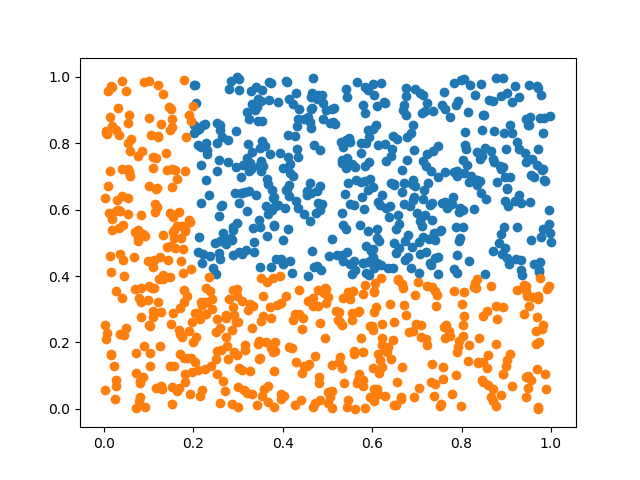


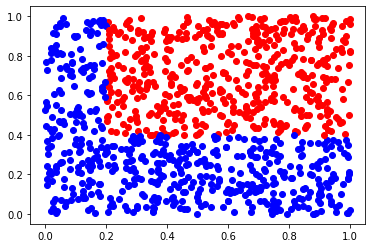

In [125]:
# Generate, split and plot the data


colors = ('r', 'g')

for i, t in enumerate((train, valid, test)):
    is_condition = t[:, -1] == 1  # Class is set by last parameter in the data

    # We choose columns conforming to this condition and choose column
    x_column_1 = t[is_condition][:, 0]
    y_column_1 = t[is_condition][:, 1]

    x_column_2 = t[torch.logical_not(is_condition)][:, 0]
    y_column_2 = t[torch.logical_not(is_condition)][:, 1]
    
    # We detach and convert to numpy, since plt does not accept torch tensors
    plt.scatter(x_column_1.detach().numpy(),
                y_column_1.detach().numpy(), color='r')
    plt.scatter(x_column_2.detach().numpy(),
                y_column_2.detach().numpy(), color='b')

plt.show()



**Run the following cell to make sure you have done the previous exercises correctly.**


In [126]:
# Verification des dimensions des donnees
assert data.shape == (1000, 3)

# Verification des division desd donnees
assert train.shape == (800, 3)
assert valid.shape == (100, 3)
assert test.shape == (100, 3)

for dataset in [train, valid, test]:
    # Verification des classes
    assert (dataset[dataset[:, -1] == 1, 0] > 0.2).all()
    assert (dataset[dataset[:, -1] == 1, 1] > 0.4).all()
    assert ((dataset[dataset[:, -1] == 0, 0] <= 0.2) |
            (dataset[dataset[:, -1] == 0, 1] <= 0.4)).all()

print('Everything looks good!')


Everything looks good!


## 2. Creating the model

In this part, we will create, with PyTorch, a model to predict the class $y$ of a point using only its coordinates $(x_0, x_1)$.

The model we will create to classify the data is a Multilayer Perceptron with a single hidden layer:

\begin{align}
h_1 &= \sigma(x W_1 + b_1) \\
\hat{y} &= \sigma(h_1 W_2 + b_2) \\
& \textrm{ avec } & \\
\sigma(t) &= \frac{1}{1+e^{-t}}
\end{align}

$\hat{y}$ will the model's estimation for the class of the point.


### Exercise 6

What are the model parameters?


Answer:

The model parameters are the weights W_1, W_2 and the corresponding biases b_1, b_2


_Implementation en PyTorch_

First we will do a low level implementation where we will only use the AutoDiff feature (which allows to automatically compute gradients) of PyTorch.

PyTorch as une API similaire a celle de numpy. La grande difference etant que pour les symbols pour lesquels on voudra avoir un gradient, nous devons inclure l'argument nommé `requires_grad=True`.

For example $W_1$ is a parameter of the model and we are interested in the gradient of the loss with respect to this symbol. So at initialization time we will add `requires_grad=True`.


### Exercise 7

What the dimensions of each of these symbols: $x, y, W_1, b_1, W_2, b_2$?


Answer:

x: (1; 2) # We take an input of a 2D point

y: (1; 2) # Since we have two classes

W_1: (2, 1) # The weight is connected to each input -> dim 2

b_1: (1) # Scalar Value

W_2: (2, 1) # The weight is connected to each middle layer node -> dim 2

b_2: (1) # Scalar Value


### Exercise 8

Create a function that initializes and returns a tuple with the MLP parameters.


In [127]:
# Create the model

def init_mlp(*args):
    """
    Initialises a MLP and returns its parameters. 

    Parameters:
        args:iterable
            E.g. (2, 2, 1) nodes per layer, first number specifies inputs, lasat outputs, 
            numbers between specify the hidden units per layer
    Returns:
        Tuple of these nodes as pytorch.tensor() s 
    """
    params = list()

    n_before = args[0]
    for n in args[1:]:
        # The weights connect n_before nodes to the current n nodes
        weights = torch.rand((n_before, n), requires_grad=True)

        # The biases only depend on the number of current nodes
        biases = torch.rand((n, 1), requires_grad=True)
        params.append((weights, biases))
        n_before = n

    return tuple(params)



params = list(init_mlp(2, 2, 1))
pprint(params)


[(tensor([[0.0812, 0.3791],
        [0.4516, 0.2695]], requires_grad=True),
  tensor([[0.8559],
        [0.7870]], requires_grad=True)),
 (tensor([[0.0587],
        [0.4500]], requires_grad=True),
  tensor([[0.6681]], requires_grad=True))]


_Run a forward pass of the model on the following data points_

### Exercise 8

What is the desired response for the following points?
$$(0.1, 0.5), (0.3, 0.5), (0.3, 0.15), (0.1, 0.15)$$


(0.1, 0.5) -> 0

(0.3, 0.5) -> 1

(0.3, 0.15) -> 0

(0.1, 0.15) -> 0


### Exercise 9

Execute the model on the previous points and print $\hat{y}$


In [128]:

# Create a function sigmoid(t) that computes the sigmoid function on t

def sigmoid(t: float) -> float:
    """
    Returns the sigmoid of the input t

    Parameters: 
        t: float

    Returns: 
        float(0, 1): sigmoid function at t
    """
    return 1 / (1 + torch.exp(-t))

# Create a function mlp(x, params) that computes the MLP outputs given the inputs x
def mlp(x, params):
    """
    Returns the forward path of the neural network defined by params.

    Parameters:
        x: 
            Input vector 
        params:
            Parameters of the neural network. Each layer is saved in a 
            tuple consisting of the weights and bias tensor

    """
    for w, b in params:
        x = sigmoid(w.t() @ x + b)
    return x


# Create a tensor containing the previous points
points = artificial_data

# Call and print output of mlp(points, params) (NOTE: use torch.no_grad())
output_mlp = []
with torch.no_grad():
    for p in points:
        p = p.reshape((2, 1))
        output_mlp.append(mlp(p, params))

# pprint(output_mlp)




We can observe that the results are not good, because they are far from the expected result.

If we want to compute on our test data the performance of the model we will define an accuracy function, which takes a decision for each data based on $\hat{y}$ and compares it to $y$.

$$
\text{accuracy} = \frac{1}{N} \sum_i^N (1 - abs(y - round(\hat{y}_i)))
$$

The accuracy represents the rate of correctly classified points. It will be $1$ if all points are correctly classified, $0$ if all are misclassified and $0.5$ if half are well classified.


### Exercise 10

Implement the accuracy using Pytorch functions `torch.mean`, `torch.abs`, `torch.round`.


In [129]:
def accuracy(estimated, reference):
    
    return torch.mean(1 - torch.abs(reference - torch.round(estimated)))
    


### Exercise 11

Write a `score_model` function that evaluates the performance (accuracy) of the model on a given data set. Print the result


In [130]:
def score_model(params, data):
    """
    Returns the accuracy of the parameters on the given dataset. 

    Args:
        params: 
        data: torch.tensor((n, 3)) in the format (x:float , y:float, 0 || 1)
    Returns: 
        float, total accuracy of the dataset
    """
    
    with torch.no_grad():
        # The data is contained in all the columns before the last one
        current_data = data[:, :-1].t()
        measured = data[:, -1]  # The class is contained in the final column
        estimated = mlp(current_data, params)

    return accuracy(estimated, measured)
    

# acc = score_model(params, train).item()
# print(f'score train: {acc:.2%}')


### Exercise 12

Do the same with `valid` and `test`


In [131]:
print(f'score valid: {score_model(params, valid):.2%}')
print(f'score test: {score_model(params, test):.2%}')

score valid: 54.00%
score test: 50.00%


### Exercise 13

Explain the results.


The score of the model is given by comparing the binary cross entropy (BCE) between the estimation of the mulitlayer perceptron (MLP) with the measured value of the dataset. Its value lies between (0, 1), where a higher score relates to a better estimation.

In the upper case a validation / test score of around 50% is measured, which was expected. Since the nodes of the MLP were instantiated randomly, we can expect the output of the model to output an approximately random output as well. Thus, obtaining a 50% success rate is not suprising.


## 4. Training the model

To find the best parameters for our model we will enter it with the training data. For this we will define a cost function to optimize.

As we are trying to solve a binary classification task, we will use the crossentropy cost function:

$$
L = \sum -y \log(\hat{y}) - (1-y) \log(1-\hat{y})
$$


### Exercise 14

Implement the cost function in PyTorch.


In [132]:
def bce(est, ref):
    
    fudge = 0.00001  # Choose a small fudge to deal with where log is not defined

    return torch.sum(- ref * torch.log(fudge + est) - (1 - ref) * torch.log(fudge + 1 - est))
    


To train our model by means of Gradient Descent (GD) we will iteratively update with small increments our parameters:

\begin{align}
W_1^n &= W_1^{n-1} - \eta \frac{\delta L}{\delta W_1} \\
b_1^n &= b_1^{n-1} - \eta \frac{\delta L}{\delta b_1} \\
W_2^n &= W_2^{n-1} - \eta \frac{\delta L}{\delta W_2} \\
b_2^n &= b_2^{n-1} - \eta \frac{\delta L}{\delta b_2}
\end{align}

Where $\eta$ is our learning rate.

We need to calculate the gradients:

$$
\frac{\delta L}{\delta W_1}, \frac{\delta L}{\delta b_1}, \frac{\delta L}{\delta W_2}, \frac{\delta L}{\delta b_2}
$$

For the gradients of the cost function with respect to the parameters, we could calculate them by hand. But we are lazy. So we will use PyTorch `error.backward()` will do this for us in an optimized way using Dynamic Programming (DP) and populate the tensors with the gradients.


Finally we will run a training of 10 `epochs` with a `batch_size=100`.
For this we will do the following steps:

1. Calculate the number of iterations (`n_iterations`) per epoch (remember that an iteration is an update of the parameters and an epoch is a competing use of all our training data)
2. Create a session
3. Initialize the variables
4. For each epoch (`for epoch in range(n_epochs):`)
   1. Randomly reorder the `train` data (use `torch.randperm()`)
   2. Evaluate and print the model score on the training data
   3. For each iteration (`for iteration in range(n_iterations):`)
      1. Select a block of `batch_size` examples
      2. _Zero the gradients_
      3. Run the forward pass on the model (`mlp()`)
      4. Compute the loss (`bce()`)
      5. Compute the gradients
      6. _Update the parameters doing gradient descent_

**Note:** Remember that PyTorch keeps track of all the operations you make with tensors to build the DAG graph. In some cases we want to avoid that, such as when setting the gradients to zero or performing the gradient descent update of the parameters. In those cases we may encapsulate the operations inside a `with torch.no_grad():` context clause. Furthermore the `grad` attribute of the tensors, may be `None` (no need to set to zero in this case) during the first run so one may do:

```
with torch.no_grad():
    if param.grad is not None:
        param.grad.zero_()

```

**Note:** When performing the parameter update of gradient descent, make sure not to reassign to the parameter a new tensor object. To avoid doing so use an inplace operation:

```
with torch.no_grad():
    param -= eta * param.grad
```

If you erronously do this `param = param - eta * param.grad`, `param` will point to a new tensor, not the original parameters of the model.

**Note:** Zero the gradients means accessing the gradient of each parameter and setting it to zero. We need this because PyTorch `.backward()` method accumulates the gradients instead of replacing them.


### Exercise 15

Implement and run a train loop for the model.


In [133]:
def train_model_get_params(params, data, lr=0.05, n_epochs=100, batch_size=16):
    n_data = data.shape[0]
    n_iterations = n_data // batch_size

    # For reusability in the next questions we comput the accuracy for each epoch
    # as well as the parameters for every epoch
    accuracy_per_epoch = {"train": [], "valid": [], "test": []}
    params_per_epoch = list()

    
    for epoch in range(n_epochs):
        random_indices = torch.randperm(n_data)
        reference_data = data[random_indices]

        for i in range(n_iterations - 1):
            # We use indexing to select each batch
            current_batch = reference_data[batch_size*i: batch_size*(i+1)]
            measured = current_batch[:, -1]  # last column contains class
            current_data = current_batch[:, :-1].t()  # rest contains data

            with torch.no_grad():
                # 1. Zero the gradients of each of the parameters because .backward() accumulates them
                for w, b in params:
                    if w.grad is not None:
                        w.grad.zero_()
                    if b.grad is not None:
                        b.grad.zero_()

            # 2. Run the forward pass on the model
            estimated = mlp(current_data, params)

            # 3. Compute the error
            loss = bce(estimated, measured)

            # 4. Compute the gradients
            loss.backward(retain_graph=True)

            # 5. Update the parameters using their gradients
            with torch.no_grad():
                for w, b in params:
                    w -= lr * w.grad
                    b -= lr * b.grad

        if epoch % 20 == 0:
            print(f"Epoch {epoch}, Accuracy: {score_model(params, train)} \n \n")

        accuracy_per_epoch["train"].append(score_model(params, train).data)
        accuracy_per_epoch["valid"].append(score_model(params, valid).data)
        accuracy_per_epoch["test"].append(score_model(params, test).data)

        # Adding copies of params to the param list
        new_params = list()
        for w, b in params:
            new_params.append((w.detach().clone(), b.detach().clone()))
        params_per_epoch.append(new_params)

    return params_per_epoch, accuracy_per_epoch



params = list(init_mlp(2, 2, 1))
params_history, _ = train_model_get_params(params, train, lr=0.01, n_epochs=100)

# print(params_history)
print(f'score valid: {score_model(params, valid):.2%}')
print(f'score test: {score_model(params, test):.2%}')


Epoch 0, Accuracy: 0.4712499976158142 
 

Epoch 20, Accuracy: 0.84375 
 

Epoch 40, Accuracy: 0.8675000071525574 
 

Epoch 60, Accuracy: 0.8662499785423279 
 

Epoch 80, Accuracy: 0.8637499809265137 
 

score valid: 86.00%
score test: 91.00%


The train_model_get_params function trains a model using mini-batch gradient descent. During each epoch the whole dataset is iterated over, then split up into batches to be processed seperately. Using pytorch's backward() function the gradient of the weights and biases with respect to the inputs can be determined in order to train the model. Additionally the accuracy per epoch is calculated for the training, test and validation set, as well as recording the params for each epoch for later processing.


## 5. Visualizing the model

To monitor the evolution of the learning of our model, we will visualize the value of the cost function, the classification score and the parameters of the first layer of our model.

We will run our experiments with different values of the following hyperparameters to better understand their effect:

- `learning_rate`
- `batch_size`

**Visualization of the cost function**

The cost function is the value we aim to reduce with the training iterations. To visualize it we will create an empty list (`couts = []`) at the beginning of our training and we will add (`couts.append(cout)`) the value resulting from the cost at each iteration. At the end of the training we will visualize the curve (`plt.plot(costs)`).

### Exercise 16

Rewrite the `train_model` function so that it returns the average loss of every epoch. Run it and plot the loss of a training procedure. While we are at it, make the printing optional with an additional keyword argument.


In [134]:
def train_model(params, data, lr=0.05, n_epochs=1, batch_size=16, print_meta=False):
    n_data = data.shape[0]
    n_iterations = n_data // batch_size
    loss_history = list()

    for epoch in range(n_epochs):
        

        # Randomly reorder the `train` data (use `torch.randperm()`)
        random_indices = torch.randperm(n_data)
        reference_data = data[random_indices]

        # Evaluate and print the model score on the training data
        if print_meta and epoch % 10 == 0:
            pass
            #print(
                #f"Epoch {epoch}, Accuracy: {score_model(params, train)} \n \n")

        loss_history_epoch = []
        

        for i in range(n_iterations):
            

            # 1. Select a block of `batch_size` examples
            current_batch = reference_data[batch_size*i: batch_size*(i+1)]
            current_data = current_batch[:, :-1].t()
            measured = current_batch[:, -1]

            # 2. Run the forward pass on the model
            estimated = mlp(current_data, params)

            # 3. Compute the error
            loss = bce(estimated, measured)
            loss_history_epoch.append(loss.data)

            # 4. Zero the gradients of each of the parameters because .backward() accumulates them
            with torch.no_grad():
                for w, b in params:
                    if w.grad is not None:
                        w.grad.zero_()
                    if b.grad is not None:
                        b.grad.zero_()

            # 5. Compute the gradients
            loss.backward(retain_graph=True)

            # 6. Update the parameters using their gradients
            with torch.no_grad():
                for w, b in params:
                    w -= lr * w.grad
                    b -= lr * b.grad

        loss_history.append(np.mean(loss_history_epoch))

    return params, loss_history


params = list(init_mlp(2, 2, 1))
train_model(params, train, lr=0.5, n_epochs=100, print_meta=False)


([(tensor([[-50.7224,   0.7088],
           [  1.3082, -54.0247]], requires_grad=True), tensor([[ 8.1729],
           [21.4918]], requires_grad=True)), (tensor([[-10.5382],
           [-12.2726]], requires_grad=True),
   tensor([[5.8780]], requires_grad=True))],
 [13.4185,
  12.437064,
  6.5611644,
  5.8521757,
  6.1834497,
  5.8076077,
  5.752036,
  3.9560034,
  3.6232271,
  2.342706,
  2.5174854,
  2.1213431,
  3.3665862,
  2.1238003,
  1.8930695,
  2.1481411,
  1.6882181,
  1.7960973,
  2.0467794,
  1.4240406,
  1.8102403,
  1.6394377,
  1.5611756,
  1.753942,
  1.6207271,
  1.7242662,
  1.3223833,
  1.0500636,
  1.4990724,
  1.7991594,
  1.9613872,
  1.5129808,
  1.3832513,
  1.5926737,
  1.3329636,
  1.3806715,
  1.9045023,
  1.3308798,
  1.4329858,
  1.7473769,
  1.6731449,
  1.4034281,
  1.1635321,
  1.5510583,
  1.25451,
  1.4923592,
  1.419495,
  0.966462,
  1.4042077,
  1.0585597,
  1.4500831,
  0.82638067,
  1.6051105,
  1.0968784,
  1.1580262,
  1.3854898,
  1.6186547,
  1.

**Effect of the learning rate**

We will run our learning with different learning rates to see its effect on the cost function.


### Exercise 17

Display the training loss curve for learning rates `[0.5, 0.05, 0.005, 0.0005]`


Text(0.5, 0, 'Epoch')

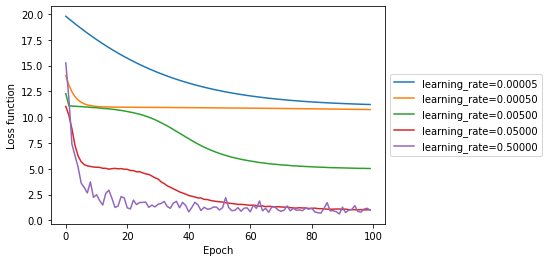

In [135]:
learning_rates = [0.5, 0.05, 0.005, 0.0005, 0.00005]
n_epochs = 100
batch_size = 16

losses = {}

# Train a model with each learning rate and populate losses with the learning rate as key and the loss series as values


for lr in learning_rates:
    params = list(init_mlp(2, 2, 1))
    _, loss = train_model(params, train, lr=lr, n_epochs=n_epochs)
    losses[lr] = loss



plt.figure()
for lr, loss_curve in sorted(losses.items()):
    plt.plot(loss_curve, label=f'learning_rate={lr:.5f}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Loss function')
plt.xlabel('Epoch')


During this exercise the loss function during the training is printed for different learning rates. Of these learning rates, the higher ones converge more quickly to a lower loss, where three different local minima can be seen. The smaller learning rates converge towards the first one, while the higher ones escape from it, staying around a different minimum for a few epochs, before falling even lower. Especially the lr=0.5 is notably, due to its raggedness. This may be due to the "jumping" around a local minimum.

Later during the development the learning rate could be varied according to the progress of the training, starting with a higher learning rate to step over local minima.


**Effect of batch size**

We will now run our training with different batch sizes to see its effect on the cost function.

### Exercise 18

Display the cost function evaluated on all training data at each epoch for batch sizes `[n_data, 100, 50, 10, 5, 1]`


Text(0.5, 0, 'Epoch')

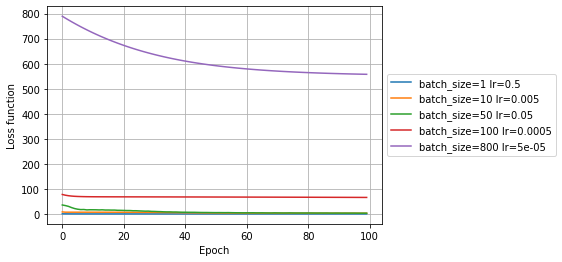

In [136]:
n_data = train.shape[0]

n_epochs = 100
batch_sizes = [n_data, 100, 50, 10, 1]
learning_rates = [0.00005, 0.0005, 0.05, 0.005, 0.5]

losses = {}


for i, lr in enumerate(learning_rates):
    for j, bs in enumerate(batch_sizes):
        if j == i:
            params = list(init_mlp(2, 2, 1))
            _, loss = train_model(
                params, train, lr=lr, batch_size=bs, n_epochs=n_epochs, print_meta=False)
            losses[(bs, lr)] = loss

# pprint(losses)


# Visualiser les courbes de cout
plt.figure()
for (bs, lr), loss_curve in sorted(losses.items()):
    plt.plot(loss_curve, label=f'batch_size={bs} lr={lr}')

plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Loss function')
plt.xlabel('Epoch')


The batch size and learning rate are varied during this exercise. The trend for lower losses for higher learning rates can be observed here as well. Smaller batch sizes correspond to a faster falling loss, while increasing the computational power needed.


**Visualization of the performance**

Another value worth monitoring is the classification accuracy of the model.


### Exercise 19

Visualize the accuracy on the train, valid and test data on each epoch


Epoch 0, Accuracy: 0.5287500023841858 
 

Epoch 20, Accuracy: 0.8849999904632568 
 

Epoch 40, Accuracy: 0.9700000286102295 
 

Epoch 60, Accuracy: 0.9787499904632568 
 

Epoch 80, Accuracy: 0.9837499856948853 
 

Epoch 100, Accuracy: 0.9825000166893005 
 

Epoch 120, Accuracy: 0.9825000166893005 
 

Epoch 140, Accuracy: 0.9887499809265137 
 

Epoch 160, Accuracy: 0.9825000166893005 
 

Epoch 180, Accuracy: 0.987500011920929 
 



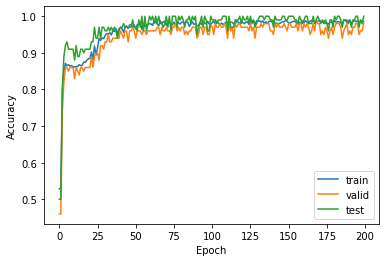

In [137]:
n_data = train.shape[0]

n_epochs = 200
batch_size = 10
learning_rate_value = 0.05

accuracies = {}

accuracies['train'] = []
accuracies['valid'] = []
accuracies['test'] = []


_, accuracies = train_model_get_params(
    init_mlp(2, 2, 1), train, lr=learning_rate_value, n_epochs=n_epochs, batch_size=batch_size
)

accuracies.pop('loss', None)  # remove accumulated losses for the plot



plt.figure()
for split, v in accuracies.items():
    plt.plot(v, label=split)

plt.legend(loc='best')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


The accuracy of the model applied to the training, validation and test set are plotted. As expected its value rises over each epoch, staying relatively constant towards the end of the training. Also, the worse accuracy of the validation set, compared to the training set can be seen.


**Visualization of the model parameters**

For pedagogical reasons we will now visualize the parameters of the model with its geometrical interpretation.
We will represent the parameters of the first layer of the MLP as a line (the decision boundary).


In [138]:
def plot_decision_boundaries(w, b, ax=None, **kwargs):
    ax = ax or plt.gca()
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    arts = []
    for i in range(w.shape[1]):
        w_i = w[:, i]
        if len(b.shape) == 1:
            b_i = b[i]
        else:
            b_i = b[:, i]

        intersections = []

        if w_i[1] != 0:
            yx0 = -w_i[0]/w_i[1] * x0 - b_i/w_i[1]
            yx1 = -w_i[0]/w_i[1] * x1 - b_i/w_i[1]

            if y0 <= yx0 <= y1:
                intersections.append((x0, yx0))

            if y0 <= yx1 <= y1:
                intersections.append((x1, yx1))

        if w_i[0] != 0:
            xy0 = -w_i[1]/w_i[0] * y0 - b_i/w_i[0]
            xy1 = -w_i[1]/w_i[0] * y1 - b_i/w_i[0]

            if x0 <= xy0 <= x1:
                intersections.append((xy0, y0))

            if x0 <= xy1 <= x1:
                intersections.append((xy1, y1))

        if len(intersections) == 2:
            xs, ys = zip(*intersections)
            lines, = ax.plot(xs, ys, **kwargs)

            arts.append(lines)

    ax.set_xlim([x0, x1])
    ax.set_ylim([y0, y1])

    return arts


def plot_model_and_data(params, dat=None, sel=None, ax=None):
    w, b, _, _ = params
    ax = ax or plt.gca()
    ax.set_prop_cycle(None)
    prop_cycle = ax._get_patches_for_fill.prop_cycler

    import itertools
    props = list(itertools.islice(prop_cycle, 3))

    all_arts = []

    if dat is not None:
        arts = ax.scatter(dat[dat[:, -1] == 1, 0], dat[dat[:, -1] == 1, 1],
                          facecolors='none', edgecolors=props[0]['color'], alpha=0.2)
        all_arts.append(arts)

        arts = ax.scatter(dat[dat[:, -1] == 0, 0], dat[dat[:, -1] == 0, 1],
                          facecolors='none', edgecolors=props[1]['color'], alpha=0.2)
        all_arts.append(arts)

    if sel is not None:
        arts = ax.scatter(sel[sel[:, -1] == 1, 0], sel[sel[:, -1] == 1, 1],
                          facecolors=props[0]['color'], edgecolors=props[0]['color'])
        all_arts.append(arts)

        arts = ax.scatter(sel[sel[:, -1] == 0, 0], sel[sel[:, -1] == 0, 1],
                          facecolors=props[1]['color'], edgecolors=props[1]['color'])
        all_arts.append(arts)

    line_arts = plot_decision_boundaries(w.detach().numpy(), b.detach().numpy(),
                                         ax=ax,
                                         color=props[2]['color'],
                                         linewidth=2.0)

    all_arts += line_arts

    return all_arts


You can use the two functions created above to visualize a learning animation. You simply get the value returned by the function `plot_model_and_data(params, sel=train, ax=ax)` after each epoch.

```
art = plot_model_and_data(params, sel=train, ax=ax)
arts.append(art)
```


### Exercise 20

Visualise the decision boundaries during a training procedure.


In [139]:
params_per_epoch, _ = train_model_get_params(
    init_mlp(2, 2, 1), train, lr=0.5, n_epochs=500, batch_size=16
)

Epoch 0, Accuracy: 0.8637499809265137 
 

Epoch 20, Accuracy: 0.9787499904632568 
 

Epoch 40, Accuracy: 0.9512500166893005 
 

Epoch 60, Accuracy: 0.9850000143051147 
 

Epoch 80, Accuracy: 0.9800000190734863 
 

Epoch 100, Accuracy: 0.9649999737739563 
 

Epoch 120, Accuracy: 0.9912499785423279 
 

Epoch 140, Accuracy: 0.9862499833106995 
 

Epoch 160, Accuracy: 0.981249988079071 
 

Epoch 180, Accuracy: 0.9850000143051147 
 

Epoch 200, Accuracy: 0.981249988079071 
 

Epoch 220, Accuracy: 0.9937499761581421 
 

Epoch 240, Accuracy: 0.9887499809265137 
 

Epoch 260, Accuracy: 0.9800000190734863 
 

Epoch 280, Accuracy: 0.9750000238418579 
 

Epoch 300, Accuracy: 0.987500011920929 
 

Epoch 320, Accuracy: 0.9837499856948853 
 

Epoch 340, Accuracy: 0.9862499833106995 
 

Epoch 360, Accuracy: 0.9962499737739563 
 

Epoch 380, Accuracy: 0.9825000166893005 
 

Epoch 400, Accuracy: 0.9900000095367432 
 

Epoch 420, Accuracy: 0.981249988079071 
 

Epoch 440, Accuracy: 0.9737499952316284 
 

In [140]:
n_data = train.shape[0]

n_epochs = 250
batch_size = 10
learning_rate_value = 0.005

arts = []
fig, ax = plt.subplots()



for i, param in enumerate(params_per_epoch):
    # changing params to conform to expected params in visualisation function
    layer_0 = param[0]
    w = layer_0[0]
    b = layer_0[1].t()

    new_param = (w, b, torch.empty(()), torch.empty(()))
    art = plot_model_and_data(new_param, sel=train.detach().numpy(), ax=ax)
    arts.append(art)



anim = animation.ArtistAnimation(
    fig, arts, interval=50, repeat_delay=3000, blit=True)
HTML(anim.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

During this exercise the training of the MLP was visualised. The weights and biases can be interpreted as parameters of linear functions. Plotting straight lines using these values over the training process allows for a visualisation of the training.


In [141]:
def plot_decision_boundaries(w, b, ax=None, **kwargs):
    ax = ax or plt.gca()
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    arts = []
    for i in range(w.shape[1]):
        w_i = w[:, i]
        if len(b.shape) == 1:
            b_i = b[i]
        else:
            b_i = b[:, i]

        intersections = []

        if w_i[1] != 0:
            yx0 = -w_i[0]/w_i[1] * x0 - b_i/w_i[1]
            yx1 = -w_i[0]/w_i[1] * x1 - b_i/w_i[1]

            if y0 <= yx0 <= y1:
                intersections.append((x0, yx0))

            if y0 <= yx1 <= y1:
                intersections.append((x1, yx1))

        if w_i[0] != 0:
            xy0 = -w_i[1]/w_i[0] * y0 - b_i/w_i[0]
            xy1 = -w_i[1]/w_i[0] * y1 - b_i/w_i[0]

            if x0 <= xy0 <= x1:
                intersections.append((xy0, y0))

            if x0 <= xy1 <= x1:
                intersections.append((xy1, y1))

        if len(intersections) == 2:
            xs, ys = zip(*intersections)
            lines, = ax.plot(xs, ys, **kwargs)

            arts.append(lines)

    ax.set_xlim([x0, x1])
    ax.set_ylim([y0, y1])

    return arts


def plot_model_and_data(params, dat=None, sel=None, ax=None):
    w, b, _, _ = params
    ax = ax or plt.gca()
    ax.set_prop_cycle(None)
    prop_cycle = ax._get_patches_for_fill.prop_cycler

    import itertools
    props = list(itertools.islice(prop_cycle, 3))

    all_arts = []

    if dat is not None:
        arts = ax.scatter(dat[dat[:, -1] == 1, 0], dat[dat[:, -1] == 1, 1],
                          facecolors='none', edgecolors=props[0]['color'], alpha=0.2)
        all_arts.append(arts)

        arts = ax.scatter(dat[dat[:, -1] == 0, 0], dat[dat[:, -1] == 0, 1],
                          facecolors='none', edgecolors=props[1]['color'], alpha=0.2)
        all_arts.append(arts)

    if sel is not None:
        arts = ax.scatter(sel[sel[:, -1] == 1, 0], sel[sel[:, -1] == 1, 1],
                          facecolors=props[0]['color'], edgecolors=props[0]['color'])
        all_arts.append(arts)

        arts = ax.scatter(sel[sel[:, -1] == 0, 0], sel[sel[:, -1] == 0, 1],
                          facecolors=props[1]['color'], edgecolors=props[1]['color'])
        all_arts.append(arts)

    line_arts = plot_decision_boundaries(w.detach().numpy(), b.detach().numpy(),
                                         ax=ax,
                                         color=props[2]['color'],
                                         linewidth=2.0)

    all_arts += line_arts

    return all_arts


## Further exploration


### [Advanced] Exercise 21

Create a new dataset as the one depicted below.

It is similar to the first one we created, but for which we require more hidden units to classify correctly.

Visualize the model being trained with an incrementing number of hidden units until reaching the theoretical minimum required amount.


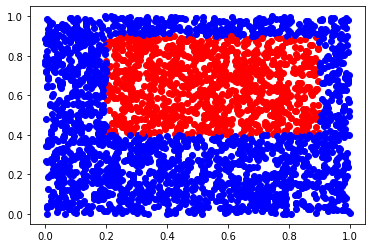

In [142]:
# Creating a new Dataset

# Originally I chose more points since the model was not converging fast enough, but leaving the number high
artificial_data = torch.rand((3_000, 2), requires_grad=True)
y_artificial_data = torch.empty((3_000, 1))

for i, point in enumerate(artificial_data):
    # conditions for being in which category
    if point[0] > 0.2 and point[1] > 0.4 and point[0] < 0.9 and point[1] < 0.9:
        y_artificial_data[i] = 1
    else:
        y_artificial_data[i] = 0

colors = ('r', 'g')

data = torch.concat((artificial_data, y_artificial_data), dim=1)

random_indices = torch.randperm(len(data))
data = data[random_indices]

train, valid, test = torch.split(data, (2500, 250, 250), dim=0)

for i, t in enumerate((train, valid, test)):
    is_condition = t[:, -1] == 1  # Class is set by last parameter in the data

    # We choose columns conforming to this condition and choose column
    x_column = t[is_condition][:, 0]
    y_column = t[is_condition][:, 1]

    x_column_ = t[torch.logical_not(is_condition)][:, 0]
    y_column_ = t[torch.logical_not(is_condition)][:, 1]

    plt.scatter(x_column.detach().numpy(),
                y_column.detach().numpy(), color='r')
    plt.scatter(x_column_.detach().numpy(),
                y_column_.detach().numpy(), color='b')

plt.show()


Similiarly to previous exercises random points were instatiated and categorised into a rectangular region with adjustable cutoff values.


In [143]:
def plot_decision_boundaries(w, b, ax=None, **kwargs):
    ax = ax or plt.gca()
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    arts = []
    for i in range(w.shape[1]):
        w_i = w[:, i]
        if len(b.shape) == 1:
            b_i = b[i]
        else:
            b_i = b[:, i]

        intersections = []

        if w_i[1] != 0:
            yx0 = -w_i[0]/w_i[1] * x0 - b_i/w_i[1]
            yx1 = -w_i[0]/w_i[1] * x1 - b_i/w_i[1]

            if y0 <= yx0 <= y1:
                intersections.append((x0, yx0))

            if y0 <= yx1 <= y1:
                intersections.append((x1, yx1))

        if w_i[0] != 0:
            xy0 = -w_i[1]/w_i[0] * y0 - b_i/w_i[0]
            xy1 = -w_i[1]/w_i[0] * y1 - b_i/w_i[0]

            if x0 <= xy0 <= x1:
                intersections.append((xy0, y0))

            if x0 <= xy1 <= x1:
                intersections.append((xy1, y1))

        if len(intersections) == 2:
            xs, ys = zip(*intersections)
            lines, = ax.plot(xs, ys, **kwargs)

            arts.append(lines)

    ax.set_xlim([x0, x1])
    ax.set_ylim([y0, y1])

    return arts


def plot_model_and_data(params, dat=None, sel=None, ax=None):
    w, b, w_2, b_2 = params
    ax = ax or plt.gca()
    ax.set_prop_cycle(None)
    prop_cycle = ax._get_patches_for_fill.prop_cycler

    import itertools
    props = list(itertools.islice(prop_cycle, 3))

    all_arts = []

    if dat is not None:
        arts = ax.scatter(dat[dat[:, -1] == 1, 0], dat[dat[:, -1] == 1, 1],
                          facecolors='none', edgecolors=props[0]['color'], alpha=0.2)
        all_arts.append(arts)

        arts = ax.scatter(dat[dat[:, -1] == 0, 0], dat[dat[:, -1] == 0, 1],
                          facecolors='none', edgecolors=props[1]['color'], alpha=0.2)
        all_arts.append(arts)

    if sel is not None:
        arts = ax.scatter(sel[sel[:, -1] == 1, 0], sel[sel[:, -1] == 1, 1],
                          facecolors=props[0]['color'], edgecolors=props[0]['color'])
        all_arts.append(arts)

        arts = ax.scatter(sel[sel[:, -1] == 0, 0], sel[sel[:, -1] == 0, 1],
                          facecolors=props[1]['color'], edgecolors=props[1]['color'])
        all_arts.append(arts)

    line_arts = plot_decision_boundaries(w.detach().numpy(), b.detach().numpy(),
                                         ax=ax,
                                         color=props[2]['color'],
                                         linewidth=2.0)
    all_arts += line_arts

    line_arts = plot_decision_boundaries(w_2.detach().numpy(), b_2.detach().numpy(),
                                         ax=ax,
                                         color=props[2]['color'],
                                         linewidth=2.0)
    all_arts += line_arts

    return all_arts


In [144]:
params_per_epoch, _ = train_model_get_params(
    # Decided on a structure with four hidden layers, since that is the minimum amount needed to 
    # Split the rectangular area off
    init_mlp(2, 4, 1), train, lr=0.5, n_epochs=200, batch_size=16
)


Epoch 0, Accuracy: 0.7175999879837036 
 

Epoch 20, Accuracy: 0.6556000113487244 
 

Epoch 40, Accuracy: 0.8600000143051147 
 

Epoch 60, Accuracy: 0.8564000129699707 
 

Epoch 80, Accuracy: 0.9092000126838684 
 

Epoch 100, Accuracy: 0.9083999991416931 
 

Epoch 120, Accuracy: 0.8519999980926514 
 

Epoch 140, Accuracy: 0.9279999732971191 
 

Epoch 160, Accuracy: 0.9115999937057495 
 

Epoch 180, Accuracy: 0.9531999826431274 
 



In [145]:
n_data = train.shape[0]

n_epochs = 250
batch_size = 10
learning_rate_value = 0.005

arts = []
fig, ax = plt.subplots()

##

for i, param in enumerate(params_per_epoch):
    if (i+1) % 100 == 0: 
        print(f"At epoch {i}")

    # changing params to conform to expected params in visualisation function
    layer = param[0]
    w_1 = layer[0][:, :2]
    b_1 = layer[1][:2].t()
    w_2 = layer[0][:, 2:]
    b_2 = layer[1][2:].t()
    new_param = (w_1, b_1, w_2, b_2)

    art = plot_model_and_data(new_param, sel=train.detach().numpy(), ax=ax)
    arts.append(art)



anim = animation.ArtistAnimation(fig, arts, interval=50, repeat_delay=3000, blit=True)
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

The visualisation of the previous exercise was extended: As can be seen, the minimum amount of straight lines to seperate these two groups is four, leading to two weight and bias pairs.

For increasing the speed of convergence a higher number of training points was chosen, in combination with the ideal parameters found during the previous exercises. However, the right-most line has not convergeed during the training. Keeping the y=mx+b analogy in mind, this could result from the necessity for high m and b values; the optimiser is caught in local minima and does not grow towards the necessary size.


### [Advanced] Exercise 22

Implement another (or all) alternative optimizers that we have seen in the lecture. Plot the loss curves of them on a same plot together with vanilla SGD.


Working on learning rate 0.5
Working on learning rate 0.05
Working on learning rate 0.005
Working on learning rate 0.005
Working on learning rate 5e-05


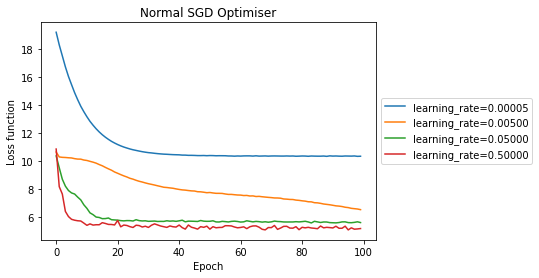

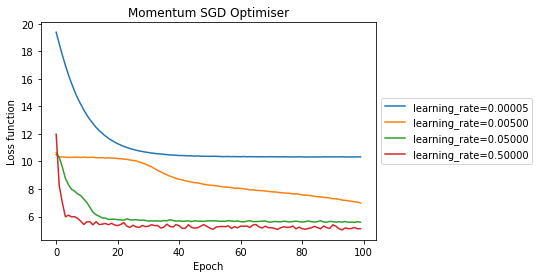

In [146]:
def train_model_momentum(params, data, lr=0.05, n_epochs=1, batch_size=16, gamma = 0.0, print_meta=False):
    n_data = data.shape[0]
    n_iterations = n_data // batch_size
    loss_history = list()

    # The momentum depends on the previous state, which is saved in the same 
    # format as params
    momentum = [0] * len(params)
    for i, (w, b) in enumerate(params):
        momentum[i] = [torch.randn_like(w), torch.randn_like(b)]
    
    for epoch in range(n_epochs):
        ##

        # Randomly reorder the `train` data (use `torch.randperm()`)
        random_indices = torch.randperm(n_data)
        reference_data = data[random_indices]

        # Evaluate and print the model score on the training data
        if print_meta and epoch % 10 == 0:
            print(f"Epoch {epoch}, Accuracy: {score_model(params, train)} \n \n")

        loss_history_epoch = list()
            
        
        for i in range(n_iterations - 1):
            ##

            # 1. Select a block of `batch_size` examples
            current_batch = reference_data[batch_size*i : batch_size*(i+1)]
            current_data = current_batch[:, :-1].t()
            measured = current_batch[:, -1]
        
            # 2. Run the forward pass on the model
            estimated = mlp(current_data, params)

            # 3. Compute the error
            loss = bce(estimated, measured)
            loss_history_epoch.append(loss)

            # 4. Zero the gradients of each of the parameters because .backward() accumulates them
            with torch.no_grad():
                for w, b in params: 
                    if w.grad is not None:
                        w.grad.zero_()
                    if b.grad is not None:
                        b.grad.zero_()

            # 5. Compute the gradients
            loss.backward(retain_graph=True)

            # 6. Update the parameters using their gradients
            with torch.no_grad():
                for (w, b), (m_w_old, m_b_old) in zip(params, momentum):
                    m_w = gamma * m_w_old + lr * w.grad 
                    m_b = gamma * m_b_old + lr * b.grad 

                    m_w_old = w 
                    m_b_old = b

                    w -= m_w
                    b -= m_b


        loss_history.append(np.mean([l.data for l in loss_history_epoch if l]))
    
    return params, loss_history


learning_rates = [0.5, 0.05, 0.005, 0.005, 0.00005]
n_epochs = 100
batch_size = 16

losses_momentum = {}
losses_normal = {}

# Train a model with each learning rate and populate losses with the learning rate as key and the loss series as values
##

for lr in learning_rates:
    print(f"Working on learning rate {lr}")
    params = list(init_mlp(2, 2, 1))
    _, loss = train_model_momentum(params, train, lr=lr, n_epochs=100, print_meta=False)
    losses_momentum[lr] = loss

    params = list(init_mlp(2, 2, 1))
    _, loss = train_model_momentum(params, train, lr=lr, n_epochs=100, print_meta=False)
    losses_normal[lr] = loss

    #print(f"Current loss: {loss}")
    


plt.figure(1)
for lr, loss_curve in sorted(losses_normal.items()):
    plt.plot(loss_curve, label=f'learning_rate={lr:.5f}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.title("Normal SGD Optimiser")
plt.show()


for lr, loss_curve in sorted(losses_momentum.items()):
    plt.plot(loss_curve, label=f'learning_rate={lr:.5f}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.title("Momentum SGD Optimiser")
plt.show()

During this exercise the vanilla stochastic gradient descent (Vanilla SGD) was improved, by adding the momentum to the descent step. Essentially the momentum of the previous iteration is added to the current step, making the step more steady.

As can be seen in the upper figures, using a momentum does not make a huge different for most learning rates in our example. The only visible difference can be seen at lr=0.05, however they still converge to the same value. 
